In [1]:
import itertools
import uproot
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.stats import chisquare

In [2]:
# Define the possible values for year, track type, and polarity
modes = ['Lb2LMM','Lb2LJPsMM']
years = [16, 17, 18]
track_types = ['LL', 'DD']
magnet_polarities = ['MU', 'MD']

# Base file path template
template_path = '/eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_MM_MVA/{mode}/MC{year}{tracktype}{polarity}/{mode}_procTuple.root'

# This dictionary can hold the file handles
file_handles = {}

# Make every combination of years, tracktype & polarity
for mode in modes: 
    for year in years:
        for track_type in track_types:
            for polarity in magnet_polarities:
                # plugs in the all values in the file path
                file_path = template_path.format(mode = mode, year=year, tracktype=track_type, polarity=polarity)
            
                # This generates the variable name for the file handle
                file_name = f'{mode}_{year}_{track_type}_{polarity}'
                        
                # Opens the file with uproot.open() and stores the handle in the file_handles dictionary
                file_handles[file_name] = uproot.open(file_path)
                print(f"Opened file {file_name}: {file_path}")

Opened file Lb2LMM_16_LL_MU: /eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_MM_MVA/Lb2LMM/MC16LLMU/Lb2LMM_procTuple.root
Opened file Lb2LMM_16_LL_MD: /eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_MM_MVA/Lb2LMM/MC16LLMD/Lb2LMM_procTuple.root
Opened file Lb2LMM_16_DD_MU: /eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_MM_MVA/Lb2LMM/MC16DDMU/Lb2LMM_procTuple.root
Opened file Lb2LMM_16_DD_MD: /eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_MM_MVA/Lb2LMM/MC16DDMD/Lb2LMM_procTuple.root
Opened file Lb2LMM_17_LL_MU: /eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_MM_MVA/Lb2LMM/MC17LLMU/Lb2LMM_procTuple.root
Opened file Lb2LMM_17_LL_MD: /eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_MM_MVA/Lb2LMM/MC17LLMD/Lb2LMM_procTuple.root
Opened file Lb2LMM_17_DD_MU: /eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_MM_MVA/Lb2LMM/MC17DDMU/Lb2LMM_procTuple.root
Opened file Lb2LMM_17_DD_MD: /eos/lhcb/wg/RD/Lb2Lll/RLambda/Tuples/v206/TupleProcess_MM_MV

In [3]:
# Create a dictionary to store branches for each file
selectvariabels = ['JPs_MM', 'JPs_PT', 'Lb_DTF_L0_JPs_PV_Lambda0_piplus_PX_0', 'Lb_DTF_L0_JPs_PV_Lambda0_piplus_PY_0', 
                   'Lb_DTF_L0_JPs_PV_Lambda0_pplus_PX_0', 'Lb_DTF_L0_JPs_PV_Lambda0_pplus_PY_0', 'Lb_DTF_L0_PV_Lambda0_piplus_PY_0',
                   'Lb_DTF_L0_PV_Lambda0_piplus_PX_0', 'Lb_DTF_L0_PV_Lambda0_pplus_PX_0', 'Lb_DTF_L0_PV_Lambda0_pplus_PY_0', 
                   'Lb_DTF_L0_PV_M_0', 'Lb_DTF_L0_JPs_PV_M_0', 'Lb_DTF_L0_PV_Lambda0_M_0', 'Lb_DTF_L0_JPs_PV_Lambda0_M_0',
                   "Lb_DTF_L0_JPs_PV_Lambda0_piplus_ID_0", 'Lb_DTF_L0_PV_Lambda0_piplus_ID_0',
                   'Lb_DTF_L0_JPs_PV_Lambda0_pplus_ID_0', 'Lb_DTF_L0_PV_Lambda0_pplus_ID_0',
                   'Lb_DTF_PV_M_0', 'Lb_DTF_PV_P_0',
                   'Lb_DTF_L0_PV_chi2_0', 'Lb_DTF_Lb_PV_Lambda0_P_0', 'Lb_DTF_Lb_L0_PV_Lambda0_decayLength_0',
                   'Lb_DTF_Lb_L0_PV_ctau_0', 'Lb_DTF_L0_PV_Lambda0_ctau_0', 'Lb_DTF_L0_PV_Lambda0_pplus_PE_0',
                   'Lb_DTF_L0_PV_PV_Z_0', 'Lb_DTF_Lb_PV_decayLength_0', 'Lb_DTF_Lb_PV_chi2_0',
                   'Lb_DTF_Lb_PV_PV_Z_0','w_GBR_kinonly_LL', 'w_GBR_kinonly_DD','w_tracking_P_common_Default',
                   'w_tracking_Pi_common_Default','w_tracking_L1_common_Default','w_tracking_L2_common_Default',
                   'L1_wPIDEffCalib_Muon_nominal','L2_wPIDEffCalib_Muon_nominal','combined_wTrigL0_correction_nominal']

branches = {}

# Iterate through the file handles and create branches
for file_name, file_handle in file_handles.items():
    # Extract the branch from the file handle
    branch = file_handle['Lb2JpsiL_mmTuple/DecayTree'].arrays(selectvariabels)
    
    # Define the branch name
    branch_name = file_name  # Extracting the sample name
    
    # Store the branch in the dictionary
    branches[branch_name] = branch

# Print the branches for each file
for branch_name, branch in branches.items():
    print(f"{branch_name} = {branch}")

# transverse momentum for protons
def calculate_protonpt(sample):
    prx_var = 'Lb_DTF_L0_JPs_PV_Lambda0_pplus_PX_0'
    pry_var = 'Lb_DTF_L0_JPs_PV_Lambda0_pplus_PY_0'
    prt_var = 'Lb_DTF_L0_JPs_PV_Lambda0_pplus_PT_0'
    
    prx_var1 = 'Lb_DTF_L0_PV_Lambda0_pplus_PX_0'
    pry_var1 = 'Lb_DTF_L0_PV_Lambda0_pplus_PY_0'
    prt_var1 = 'Lb_DTF_L0_PV_Lambda0_pplus_PT_0'
    
    prx_values = branches[sample][prx_var]
    pry_values = branches[sample][pry_var]
    prt_values = np.sqrt(prx_values**2 + pry_values**2)
    branches[sample][prt_var] = prt_values
    
    prx_values1 = branches[sample][prx_var1]
    pry_values1 = branches[sample][pry_var1]
    prt_values1 = np.sqrt(prx_values1**2 + pry_values1**2)
    branches[sample][prt_var1] = prt_values1
    
# Calculate new proton pT variables for each sample
for branch_name in branches:
    calculate_protonpt(branch_name)

# for the pions
def calculate_pionpt(sample):
    pix_var = 'Lb_DTF_L0_JPs_PV_Lambda0_piplus_PX_0'
    piy_var = 'Lb_DTF_L0_JPs_PV_Lambda0_piplus_PY_0'
    pit_var = 'Lb_DTF_L0_JPs_PV_Lambda0_piplus_PT_0'

    pix_var1 = 'Lb_DTF_L0_PV_Lambda0_piplus_PX_0'
    piy_var1 = 'Lb_DTF_L0_PV_Lambda0_piplus_PY_0'
    pit_var1 = 'Lb_DTF_L0_PV_Lambda0_piplus_PT_0'
             
    pix_values = branches[sample][pix_var]
    piy_values = branches[sample][piy_var]
    pit_values = np.sqrt(pix_values**2 + piy_values**2)
    branches[sample][pit_var] = pit_values
    
    pix_values1 = branches[sample][pix_var1]
    piy_values1 = branches[sample][piy_var1]
    pit_values1 = np.sqrt(pix_values1**2 + piy_values1**2)
    branches[sample][pit_var1] = pit_values1
    
# Calculate new pion pT variables for each sample
for branch_name in branches:
    calculate_pionpt(branch_name)

Lb2LMM_16_LL_MU = [{JPs_MM: 2.23e+03, JPs_PT: 4.5e+03, ... combined_wTrigL0_correction_nominal: 1.15}]
Lb2LMM_16_LL_MD = [{JPs_MM: 3.61e+03, JPs_PT: 1.51e+03, ... combined_wTrigL0_correction_nominal: 1.14}]
Lb2LMM_16_DD_MU = [{JPs_MM: 3.6e+03, JPs_PT: 6.43e+03, ... combined_wTrigL0_correction_nominal: 1.04}]
Lb2LMM_16_DD_MD = [{JPs_MM: 3.86e+03, JPs_PT: 1.25e+04, ... combined_wTrigL0_correction_nominal: 1.02}]
Lb2LMM_17_LL_MU = [{JPs_MM: 3.26e+03, ... combined_wTrigL0_correction_nominal: 0.995}]
Lb2LMM_17_LL_MD = [{JPs_MM: 4.09e+03, JPs_PT: 2.07e+03, ... combined_wTrigL0_correction_nominal: 1}]
Lb2LMM_17_DD_MU = [{JPs_MM: 2.93e+03, JPs_PT: 313, ... combined_wTrigL0_correction_nominal: 1}]
Lb2LMM_17_DD_MD = [{JPs_MM: 2.78e+03, ... combined_wTrigL0_correction_nominal: 0.967}]
Lb2LMM_18_LL_MU = [{JPs_MM: 3.59e+03, ... combined_wTrigL0_correction_nominal: 0.985}]
Lb2LMM_18_LL_MD = [{JPs_MM: 3.09e+03, JPs_PT: 5.91e+03, ... combined_wTrigL0_correction_nominal: 1.03}]
Lb2LMM_18_DD_MU = [{JPs_

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(


In [4]:
# Define dictionaries to store branches for DD and LL files
# these will help with the weigths and cuts. 
branches_DD = {}
branches_LL = {}

for branch_name, branch in branches.items():
    if 'DD' in branch_name:
        branches_DD[branch_name] = branch
    else:
        branches_LL[branch_name] = branch

# print(branches_DD['Lb2LMM_17_DD_MD']['Lb_DTF_L0_PV_Lambda0_piplus_PT_0'])

samples_to_plot_DD = list(branches_DD.keys())
samples_to_plot_LL = list(branches_LL.keys())

for sample in samples_to_plot_DD:
    branches_DD[sample]['combined_weight'] = (
        branches_DD[sample]['w_GBR_kinonly_DD'] *  # Use w_GBR_kinonly_LL if LL sample
        branches_DD[sample]['w_tracking_P_common_Default'] *
        branches_DD[sample]['w_tracking_Pi_common_Default'] *
        branches_DD[sample]['w_tracking_L1_common_Default'] *
        branches_DD[sample]['w_tracking_L2_common_Default'] *
        branches_DD[sample]['L1_wPIDEffCalib_Muon_nominal'] *
        branches_DD[sample]['L2_wPIDEffCalib_Muon_nominal'] *
        branches_DD[sample]['combined_wTrigL0_correction_nominal']
    )
    
for sample in samples_to_plot_LL:
    branches_LL[sample]['combined_weight'] = (
        branches_LL[sample]['w_GBR_kinonly_LL'] *  # Use w_GBR_kinonly_DD if DD sample
        branches_LL[sample]['w_tracking_P_common_Default'] *
        branches_LL[sample]['w_tracking_Pi_common_Default'] *
        branches_LL[sample]['w_tracking_L1_common_Default'] *
        branches_LL[sample]['w_tracking_L2_common_Default'] *
        branches_LL[sample]['L1_wPIDEffCalib_Muon_nominal'] *
        branches_LL[sample]['L2_wPIDEffCalib_Muon_nominal'] *
        branches_LL[sample]['combined_wTrigL0_correction_nominal']
    )

In [5]:
mass_up = 1000 * np.sqrt(8)  # so that we plot below q2 = 8 GeV^2/c^4
mass_muon = 105.66  # in MeV/c^2

# we would like to count all the events. 
dim_LL_countsmax = {}#dictionary to count LL of Lb2LMM
dim_LL_countsmin = {}

nor_LL_countsmax = {} #stores LL of Lb2LJPsMM
nor_LL_countsmin = {}

dim_DD_countsmax = {} #dictionary to count DD of Lb2LMM
dim_DD_countsmin = {}

nor_DD_countsmax = {} #stores DD of Lb2LJPsMM
nor_DD_countsmin = {}

# Now apply the appropriate weights and selections, only on the LL samples 
# there will be a pT cut on charged hadrons. Lets start with that: 

for sample in samples_to_plot_LL: 
    tot_weight_LL = branches_LL[sample]['combined_weight']
    # Set the q2 upper and lower values for low q2
    lqmass_hcut_LL = branches_LL[sample]['JPs_MM'] < mass_up
    lqmass_lcut_LL = 2 * mass_muon < branches_LL[sample]['JPs_MM']
    lq2intmask_LL = lqmass_hcut_LL & lqmass_lcut_LL
    
    # Set the q2 upper and lower values for high q2
    hqmass_hcut_LL = branches_LL[sample]['JPs_MM'] > mass_up
    hqmass_lcut_LL = 1000*np.sqrt(11) > branches_LL[sample]['JPs_MM']
    hq2intmask_LL = hqmass_hcut_LL & hqmass_lcut_LL
    # Now set up the selections for dimuon (x1-x7) and normalisation mode.
    x1_LL = branches_LL[sample]['Lb_DTF_L0_PV_Lambda0_piplus_ID_0'] == -211.0
    x2_LL = branches_LL[sample]['Lb_DTF_L0_PV_Lambda0_pplus_ID_0'] == 2212.0
    x3_LL = branches_LL[sample]['Lb_DTF_L0_PV_Lambda0_pplus_PT_0'] > 500
    x4_LL = branches_LL[sample]['Lb_DTF_L0_PV_Lambda0_piplus_PT_0'] >500
    x5_LL = branches_LL[sample]['JPs_PT'] > 1000
    x6_LL = branches_LL[sample]['Lb_DTF_L0_PV_Lambda0_M_0'] < 1115+20
    x7_LL = branches_LL[sample]['Lb_DTF_L0_PV_Lambda0_M_0'] > 1115-20
    x8_LL = branches_LL[sample]['Lb_DTF_Lb_L0_PV_ctau_0'] < 100
    x9_LL = branches_LL[sample]['Lb_DTF_Lb_PV_chi2_0'] < 30
    ######################### 
    x10_LL = branches_LL[sample]['Lb_DTF_L0_JPs_PV_Lambda0_piplus_ID_0'] == -211.0
    x20_LL = branches_LL[sample]['Lb_DTF_L0_JPs_PV_Lambda0_pplus_ID_0'] == 2212.0
    x30_LL = branches_LL[sample]['Lb_DTF_L0_JPs_PV_Lambda0_pplus_PT_0'] > 500
    x40_LL = branches_LL[sample]['Lb_DTF_L0_JPs_PV_Lambda0_piplus_PT_0'] >500
    x60_LL = branches_LL[sample]['Lb_DTF_L0_JPs_PV_Lambda0_M_0'] < 1115+20
    x70_LL = branches_LL[sample]['Lb_DTF_L0_JPs_PV_Lambda0_M_0'] > 1115-20
    
    total_cut_LL = lq2intmask_LL & x1_LL & x2_LL & x3_LL & x4_LL & x5_LL & x6_LL & x7_LL & x8_LL & x9_LL
    h_total_cut_LL = hq2intmask_LL & x10_LL & x20_LL & x30_LL & x40_LL & x5_LL & x60_LL & x70_LL & x8_LL & x9_LL
    
    hist_LL, bin_edges_LL = np.histogram(branches_LL[sample]['JPs_MM'][total_cut_LL], bins=50, weights=tot_weight_LL[total_cut_LL])
    weights_squared_LL = tot_weight_LL[total_cut_LL] ** 2
    hist_squared_LL, _ = np.histogram(branches_LL[sample]['JPs_MM'][total_cut_LL], bins=50, weights=weights_squared_LL)
    errors_LL = np.sqrt(hist_squared_LL)
    bin_centers_LL = (bin_edges_LL[:-1] + bin_edges_LL[1:]) / 2
    
    h_hist_LL, h_bin_edges_LL = np.histogram(branches_LL[sample]['JPs_MM'][h_total_cut_LL], bins=50, weights=tot_weight_LL[h_total_cut_LL])
    h_weights_squared_LL = tot_weight_LL[h_total_cut_LL] ** 2
    h_hist_squared_LL, _ = np.histogram(branches_LL[sample]['JPs_MM'][h_total_cut_LL], bins=50, weights=h_weights_squared_LL)
    h_errors_LL = np.sqrt(h_hist_squared_LL)
    h_bin_centers_LL = (h_bin_edges_LL[:-1] + h_bin_edges_LL[1:]) / 2
    
    
    # Now the number of events to the count dictionaries: 
    if "Lb2LMM" in sample:
        dim_LL_countsmax[sample] = np.sum(hist_LL+errors_LL)
        dim_LL_countsmin[sample] = np.sum(hist_LL-errors_LL)
        
    if "Lb2LJPsMM" in sample:
        nor_LL_countsmax[sample] = np.sum(h_hist_LL+h_errors_LL)
        nor_LL_countsmin[sample] = np.sum(h_hist_LL-h_errors_LL)
        
print(dim_LL_countsmax)
print(nor_LL_countsmax)

for sample in samples_to_plot_DD: 
    tot_weight_DD = branches_DD[sample]['combined_weight']
    # Set the q2 upper and lower values for low q2
    lqmass_hcut_DD = branches_DD[sample]['JPs_MM'] < mass_up
    lqmass_lcut_DD = 2 * mass_muon < branches_DD[sample]['JPs_MM']
    lq2intmask_DD = lqmass_hcut_DD & lqmass_lcut_DD
    
    # Set the q2 upper and lower values for high q2
    hqmass_hcut_DD = branches_DD[sample]['JPs_MM'] > mass_up
    hqmass_lcut_DD = 1000*np.sqrt(11) > branches_DD[sample]['JPs_MM']
    hq2intmask_DD = hqmass_hcut_DD & hqmass_lcut_DD
    # Now set up the selections for dimuon (x1-x7) and normalisation mode.
    x1_DD = branches_DD[sample]['Lb_DTF_L0_PV_Lambda0_piplus_ID_0'] == -211.0
    x2_DD = branches_DD[sample]['Lb_DTF_L0_PV_Lambda0_pplus_ID_0'] == 2212.0
#     x3_DD = branches_DD[sample]['Lb_DTF_L0_PV_Lambda0_pplus_PT_0'] > 500
#     x4_DD = branches_DD[sample]['Lb_DTF_L0_PV_Lambda0_piplus_PT_0'] >500
#     x5_DD = branches_DD[sample]['JPs_PT'] > 1000
    x6_DD = branches_DD[sample]['Lb_DTF_L0_PV_Lambda0_M_0'] < 1115+20
    x7_DD = branches_DD[sample]['Lb_DTF_L0_PV_Lambda0_M_0'] > 1115-20
    x8_DD = branches_DD[sample]['Lb_DTF_Lb_L0_PV_ctau_0'] < 100
    x9_DD = branches_DD[sample]['Lb_DTF_Lb_PV_chi2_0'] < 30
    ######################### 
    x10_DD = branches_DD[sample]['Lb_DTF_L0_JPs_PV_Lambda0_piplus_ID_0'] == -211.0
    x20_DD = branches_DD[sample]['Lb_DTF_L0_JPs_PV_Lambda0_pplus_ID_0'] == 2212.0
    x30_DD = branches_DD[sample]['Lb_DTF_L0_JPs_PV_Lambda0_pplus_PT_0'] > 500
    x40_DD = branches_DD[sample]['Lb_DTF_L0_JPs_PV_Lambda0_piplus_PT_0'] >500
    x60_DD = branches_DD[sample]['Lb_DTF_L0_JPs_PV_Lambda0_M_0'] < 1115+20
    x70_DD = branches_DD[sample]['Lb_DTF_L0_JPs_PV_Lambda0_M_0'] > 1115-20
    
    total_cut_DD = lq2intmask_DD & x1_DD & x2_DD & x6_DD & x7_DD & x8_DD & x9_DD
    h_total_cut_DD = hq2intmask_DD & x10_DD & x20_DD & x30_DD & x40_DD & x60_DD & x70_DD & x8_DD & x9_DD
    
    hist_DD, bin_edges_DD = np.histogram(branches_DD[sample]['JPs_MM'][total_cut_DD], bins=50, weights=tot_weight_DD[total_cut_DD])
    weights_squared_DD = tot_weight_DD[total_cut_DD] ** 2
    hist_squared_DD, _ = np.histogram(branches_DD[sample]['JPs_MM'][total_cut_DD], bins=50, weights=weights_squared_DD)
    errors_DD = np.sqrt(hist_squared_DD)
    bin_centers_DD = (bin_edges_DD[:-1] + bin_edges_DD[1:]) / 2
    
    h_hist_DD, h_bin_edges_DD = np.histogram(branches_DD[sample]['JPs_MM'][h_total_cut_DD], bins=50, weights=tot_weight_DD[h_total_cut_DD])
    h_weights_squared_DD = tot_weight_DD[h_total_cut_DD] ** 2
    h_hist_squared_DD, _ = np.histogram(branches_DD[sample]['JPs_MM'][h_total_cut_DD], bins=50, weights=h_weights_squared_DD)
    h_errors_DD = np.sqrt(h_hist_squared_DD)
    h_bin_centers_DD = (h_bin_edges_DD[:-1] + h_bin_edges_DD[1:]) / 2
    
    # Now the number of events to the count dictionaries: 
    if "Lb2LMM" in sample:
        dim_DD_countsmax[sample] = np.sum(hist_DD + errors_DD)
        dim_DD_countsmin[sample] = np.sum(hist_DD - errors_DD)
        
    if "Lb2LJPsMM" in sample:
        nor_DD_countsmax[sample] = np.sum(h_hist_DD + h_errors_DD)
        nor_DD_countsmin[sample] = np.sum(h_hist_DD - h_errors_DD)
        
print(dim_DD_countsmax)
print(nor_DD_countsmax)
print()
print(dim_LL_countsmax)
print(dim_LL_countsmin)

{'Lb2LMM_16_LL_MU': 395.896, 'Lb2LMM_16_LL_MD': 413.00366, 'Lb2LMM_17_LL_MU': 394.76837, 'Lb2LMM_17_LL_MD': 466.7634, 'Lb2LMM_18_LL_MU': 469.91736, 'Lb2LMM_18_LL_MD': 391.3013}
{'Lb2LJPsMM_16_LL_MU': 1276.7367, 'Lb2LJPsMM_16_LL_MD': 1273.4846, 'Lb2LJPsMM_17_LL_MU': 1268.897, 'Lb2LJPsMM_17_LL_MD': 1350.8765, 'Lb2LJPsMM_18_LL_MU': 1163.7734, 'Lb2LJPsMM_18_LL_MD': 1253.2968}
{'Lb2LMM_16_DD_MU': 2309.2236, 'Lb2LMM_16_DD_MD': 2600.855, 'Lb2LMM_17_DD_MU': 2325.562, 'Lb2LMM_17_DD_MD': 2432.3506, 'Lb2LMM_18_DD_MU': 2630.9783, 'Lb2LMM_18_DD_MD': 2640.4626}
{'Lb2LJPsMM_16_DD_MU': 4241.087, 'Lb2LJPsMM_16_DD_MD': 4185.8154, 'Lb2LJPsMM_17_DD_MU': 4277.356, 'Lb2LJPsMM_17_DD_MD': 4188.615, 'Lb2LJPsMM_18_DD_MU': 4127.1533, 'Lb2LJPsMM_18_DD_MD': 4150.78}

{'Lb2LMM_16_LL_MU': 395.896, 'Lb2LMM_16_LL_MD': 413.00366, 'Lb2LMM_17_LL_MU': 394.76837, 'Lb2LMM_17_LL_MD': 466.7634, 'Lb2LMM_18_LL_MU': 469.91736, 'Lb2LMM_18_LL_MD': 391.3013}
{'Lb2LMM_16_LL_MU': 170.24521, 'Lb2LMM_16_LL_MD': 175.17534, 'Lb2LMM_17_LL

In [6]:


dim_LL_counts = {}
dim_LL_err = {}
for key in dim_LL_countsmax.keys():
    dim_LL_counts[key] = (dim_LL_countsmax[key] + dim_LL_countsmin[key]) / 2
    dim_LL_err[key] = (dim_LL_countsmax[key] - dim_LL_countsmin[key]) / 2

dim_DD_counts = {}
dim_DD_err = {}
for key in dim_DD_countsmax.keys():
    dim_DD_counts[key] = (dim_DD_countsmax[key] + dim_DD_countsmin[key]) / 2
    dim_DD_err[key] = (dim_DD_countsmax[key] - dim_DD_countsmin[key]) / 2

nor_LL_counts = {}
nor_LL_err = {}
for key in nor_LL_countsmax.keys():
    nor_LL_counts[key] = (nor_LL_countsmax[key] + nor_LL_countsmin[key]) / 2
    nor_LL_err[key] = (nor_LL_countsmax[key] - nor_LL_countsmin[key]) / 2


nor_DD_counts = {}
nor_DD_err = {}
for key in nor_DD_countsmax.keys():
    nor_DD_counts[key] = (nor_DD_countsmax[key] + nor_DD_countsmin[key]) / 2
    nor_DD_err[key] = (nor_DD_countsmax[key] - nor_DD_countsmin[key]) / 2
    
       
#print(dim_DD_counts)

# Now to obtain eff_sec x eff_rec, which is equal to the number of events that 
# passed all the cuts, divided by the total number of requested events. 
# this will be sorted by year in the dictionary.

# The total number of events requested is 3*10^6 for both samples for all years 

dimuon_counts = {'2016': 0, '2017': 0, '2018': 0}
dimuon_errors = {'2016': 0, '2017': 0, '2018': 0}

# This funcions finds the years; 
def find_year(key):
    return '2016' if '16' in key else '2017' if '17' in key else '2018'

# Sum the values for each year in dim_LL_counts
for key, value in dim_LL_counts.items():
    year = find_year(key)
    dimuon_counts[year] += value

# Sum the values for each year in dim_DD_counts
for key, value in dim_DD_counts.items():
    year = find_year(key)
    dimuon_counts[year] += value

#finding the errors that come from the weigths
for key, value in dim_LL_counts.items():
    year = find_year(key)
    dimuon_counts[year] += value
    dimuon_errors[year] += dim_LL_err[key]**2

for key, value in dim_DD_counts.items():
    year = find_year(key)
    dimuon_counts[year] += value
    dimuon_errors[year] += dim_DD_err[key]**2

# Take the square root of the summed errors
for year in dimuon_errors:
    dimuon_errors[year] = np.sqrt(dimuon_errors[year])
    
#### Now a similar thing for the normalisation samples: 

normal_counts = {'2016': 0, '2017': 0, '2018': 0}
normal_errors = {'2016': 0, '2017': 0, '2018': 0}

for key, value in nor_LL_counts.items():
    year = find_year(key)
    normal_counts[year] += value

# Sum the values for each year in dim_DD_counts
for key, value in nor_DD_counts.items():
    year = find_year(key)
    normal_counts[year] += value

#finding the errors that come from the weigths
for key, value in nor_LL_counts.items():
    year = find_year(key)
    normal_counts[year] += value
    normal_errors[year] += nor_LL_err[key]**2

for key, value in nor_DD_counts.items():
    year = find_year(key)
    normal_counts[year] += value
    normal_errors[year] += nor_DD_err[key]**2

# Take the square root of the summed errors
for year in normal_errors:
    normal_errors[year] = np.sqrt(normal_errors[year])
    
print(dimuon_counts)
print(dimuon_errors)
print(normal_counts)
print(normal_errors)

dimuongeneff = {'2016' : 0.20035,'2017' : 0.20045, '2018' : 0.19923}
dimuongeneff_error = {'2016' : 0.00070,'2017' : 0.00075, '2018' : 0.00074}               
normalgeneff = {'2016' : 0.19832,'2017' : 0.19753, '2018' : 0.19793}
normalgeneff_error = {'2016' : 0.00049,'2017' : 0.00065, '2018' : 0.00071}    

# All these number should be divided by the number of events (3*10^6 for each year)
# and to complete the full efficiency: eff_gen x eff_rec x eff_sec then for each year 
# multiply by that Generator level cut efficiency

#now to compute eff_gen x eff_rec x eff_sec 
dimuontoteff = {}
normaltoteff = {}
for year in dimuongeneff:
    dimuontoteff[year] = dimuongeneff[year] * dimuon_counts[year]/(3*10**6)
    normaltoteff[year] = normalgeneff[year] * normal_counts[year]/(3*10**6)

# and the errors: 
dimuontoteff_error = {}
normaltoteff_error = {}
for year in dimuongeneff:
    dimuontoteff_error[year] = dimuontoteff[year]*((dimuongeneff_error[year]/dimuongeneff[year]) +
                                                  (dimuon_errors[year]/dimuon_counts[year]))
    normaltoteff_error[year] = normaltoteff[year]*((normalgeneff_error[year]/normalgeneff[year]) +
                                                  (normal_errors[year]/normal_counts[year]))
print(dimuontoteff)    
print(dimuontoteff_error) 
print(normaltoteff) 
print(normaltoteff_error) 

lumi_year_weights = {
        "2016": 0.298,
        "2017": 0.309,
        "2018": 0.393
}

##################################################################################
#lastly there must be a sum over the years for both samples to obtain the total efficiency:
#################################################################################


Lb2LMM_toteff = 0 
Lb2LMM_toteff_error = 0 
Lb2LJPsMM_toteff = 0
Lb2LJPsMM_toteff_error = 0

for year in dimuontoteff:
    Lb2LMM_toteff += dimuontoteff[year] * lumi_year_weights[year]
    Lb2LMM_toteff_error += dimuontoteff_error[year] * lumi_year_weights[year]
    
    Lb2LJPsMM_toteff += normaltoteff[year] * lumi_year_weights[year]
    Lb2LJPsMM_toteff_error += normaltoteff_error[year] * lumi_year_weights[year]

print(Lb2LMM_toteff, 
Lb2LMM_toteff_error,  
Lb2LJPsMM_toteff, 
Lb2LJPsMM_toteff_error)

{'2016': 9540.000183105469, '2017': 9485.038635253906, '2018': 10456.148376464844}
{'2016': 533.2067906413873, '2017': 487.1489562548104, '2018': 507.3571209411726}
{'2016': 20256.177978515625, '2017': 20623.544189453125, '2018': 19722.34912109375}
{'2016': 448.32014702855645, '2017': 397.1988937710679, '2018': 443.0971770420137}
{'2016': 0.0006371130122283936, '2017': 0.0006337586648122152, '2018': 0.0006943928136810302}
{'2016': 3.783532687772526e-05, '2017': 3.492092908590573e-05, '2018': 3.6272769667897925e-05}
{'2016': 0.001339068405566406, '2017': 0.001357922894580892, '2018': 0.0013012148538460286}
{'2016': 3.2945459589391985e-05, '2017': 3.062133373658119e-05, '2018': 3.390169737596744e-05}
0.000411320689499222 2.268533624779135e-05 0.0008307544715107017 2.036228348524917e-05


In [7]:
dim_LL = {}
dim_LLerr = {}
# List of keys to process in pairs
dimLLkeys = list(dim_LL_counts.keys())
# Iterate through the keys in pairs and sum the values
for i in range(0, len(dimLLkeys), 2):
    # Extract the prefix for the new key ('Lb2LMM_16_LL' f.e.) where we will add MU and MD
    prefix = '_'.join(dimLLkeys[i].split('_')[:-1])
    # Sum the values of the current pair of keys
    dim_LL[prefix] = dim_LL_counts[dimLLkeys[i]] + dim_LL_counts[dimLLkeys[i+1]]
    dim_LLerr[prefix] = np.sqrt(dim_LL_err[dimLLkeys[i]]**2 + dim_LL_err[dimLLkeys[i+1]]**2)

    
dim_DD = {}
dim_DDerr = {}
# List of keys to process in pairs
dimDDkeys = list(dim_DD_counts.keys())
# Iterate through the keys in pairs and sum the values
for i in range(0, len(dimDDkeys), 2):
    # Extract the prefix for the new key ('Lb2LMM_16_LL' f.e.) where we will add MU and MD
    prefix = '_'.join(dimDDkeys[i].split('_')[:-1])
    # Sum the values of the current pair of keys
    dim_DD[prefix] = dim_DD_counts[dimDDkeys[i]] + dim_DD_counts[dimDDkeys[i+1]]
    dim_DDerr[prefix] = np.sqrt(dim_DD_err[dimDDkeys[i]]**2 + dim_DD_err[dimDDkeys[i+1]]**2)    
    
    
nor_LL = {}
nor_LLerr = {}
# List of keys to process in pairs
norLLkeys = list(nor_LL_counts.keys())
# Iterate through the keys in pairs and sum the values
for i in range(0, len(norLLkeys), 2):
    # Extract the prefix for the new key ('Lb2LMM_16_LL' f.e.) where we will add MU and MD
    prefix = '_'.join(norLLkeys[i].split('_')[:-1])
    # Sum the values of the current pair of keys
    nor_LL[prefix] = nor_LL_counts[norLLkeys[i]] + nor_LL_counts[norLLkeys[i+1]]
    nor_LLerr[prefix] = np.sqrt(nor_LL_err[norLLkeys[i]]**2 + nor_LL_err[norLLkeys[i+1]]**2)

    
nor_DD = {}
nor_DDerr = {}
# List of keys to process in pairs
norDDkeys = list(nor_DD_counts.keys())
# Iterate through the keys in pairs and sum the values
for i in range(0, len(dimDDkeys), 2):
    # Extract the prefix for the new key ('Lb2LMM_16_LL' f.e.) where we will add MU and MD
    prefix = '_'.join(norDDkeys[i].split('_')[:-1])
    # Sum the values of the current pair of keys
    nor_DD[prefix] = nor_DD_counts[norDDkeys[i]] + nor_DD_counts[norDDkeys[i+1]]
    nor_DDerr[prefix] = np.sqrt(nor_DD_err[norDDkeys[i]]**2 + nor_DD_err[norDDkeys[i+1]]**2)    
        
    
# Print the new dictionary

# print(dim_LL)
# print(dim_DD)
# print(nor_LL)
# print(nor_DD)
# print(dim_LLerr)
# # One of the last loops to find eff_rec x eff_sel which is equal to the number of elements passing 
# # the cuts divided by number of requeste samples 
# summed_dict = {}

# # Loop through the keys in the first dictionary
# for key_LL in dict_LL:
#     # Construct the corresponding key for the second dictionary
#     key_DD = key_LL.replace('_LL', '_DD')
    
#     # Check if the corresponding key exists in the second dictionary
#     if key_DD in dict_DD:
#         # Sum the corresponding values
#         summed_value = dict_LL[key_LL] + dict_DD[key_DD]
#         # Store the result in the new dictionary
#         summed_dict[key_LL.replace('_LL', '')] = summed_value

# print("Summed dictionary:", summed_dict)



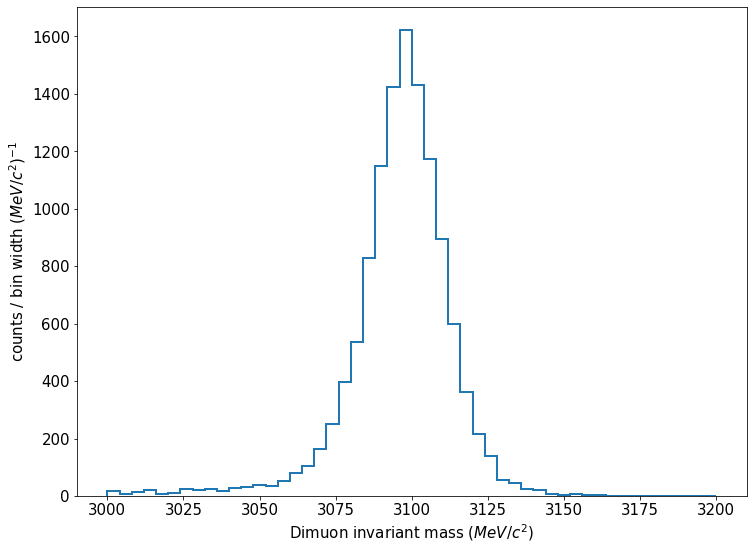

In [25]:
plt.figure(figsize = (12,9))
plt.hist(branches_LL['Lb2LJPsMM_18_LL_MU']['JPs_MM'], bins = 50, range = (3000, 3200), histtype = 'step', linewidth = 2)
plt.xlabel("Dimuon invariant mass $(MeV/c^2)$", size = 15)
plt.xticks(size = 15)
plt.ylabel("counts / bin width $(MeV/c^2)^{-1}$", size = 15)
plt.yticks(size = 15)
plt.show()

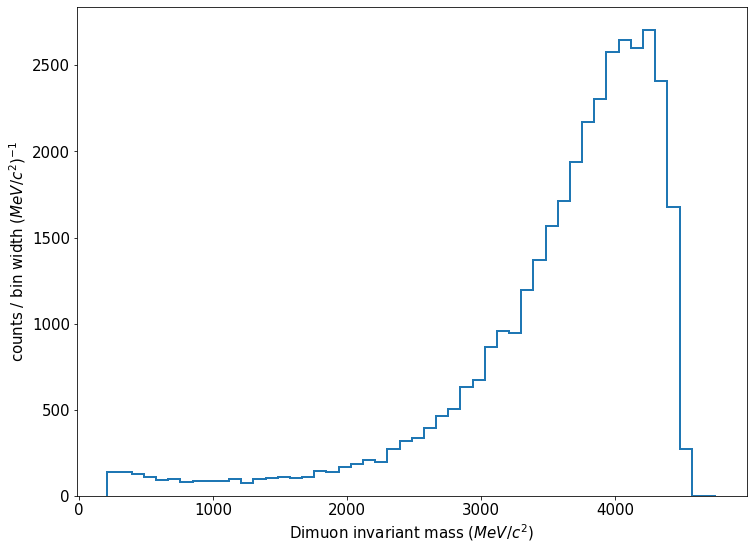

In [24]:
plt.figure(figsize = (12,9))
plt.hist(branches_DD['Lb2LMM_18_DD_MU']['JPs_MM'], bins = 50, histtype = 'step', linewidth = 2)
plt.xlabel("Dimuon invariant mass $(MeV/c^2)$", size = 15)
plt.xticks(size = 15)
plt.ylabel("counts / bin width $(MeV/c^2)^{-1}$", size = 15)
plt.yticks(size = 15)
plt.show()